c:\Users\Usuario\Documents\Docs\Trabajos\Vision por Computador\Trabajo1\img\4.segmentacion
Area del (Rojos) 1: 16.5 en pixeles^2
Area del (Rojos) 2: 19.0 en pixeles^2
Area del (Rojos) 3: 16.5 en pixeles^2
Area del (Rojos) 4: 27.0 en pixeles^2
Area del (Rojos) 5: 48.5 en pixeles^2
Area del (Rojos) 6: 26.5 en pixeles^2
Area del (Rojos) 7: 43.5 en pixeles^2
Area del (Rojos) 8: 346.0 en pixeles^2
Area del (Rojos) 9: 57.0 en pixeles^2
Area del (Rojos) 10: 19.0 en pixeles^2
Area del (Rojos) 11: 15.5 en pixeles^2
Area del (Rojos) 12: 25.5 en pixeles^2
Area del (Rojos) 13: 31.0 en pixeles^2
Area del (Rojos) 14: 21.5 en pixeles^2
Area del (Rojos) 15: 50.5 en pixeles^2
Area del (Rojos) 16: 20.0 en pixeles^2
Area del (Rojos) 17: 16.0 en pixeles^2
Area del (Rojos) 18: 16.5 en pixeles^2
Area del (Rojos) 19: 77.0 en pixeles^2
Area del (Rojos) 20: 17.5 en pixeles^2
Area del (Rojos) 21: 16.5 en pixeles^2
Area del (Rojos) 22: 19.0 en pixeles^2
Area del (Rojos) 23: 130.5 en pixeles^2
Area del (Rojos) 24

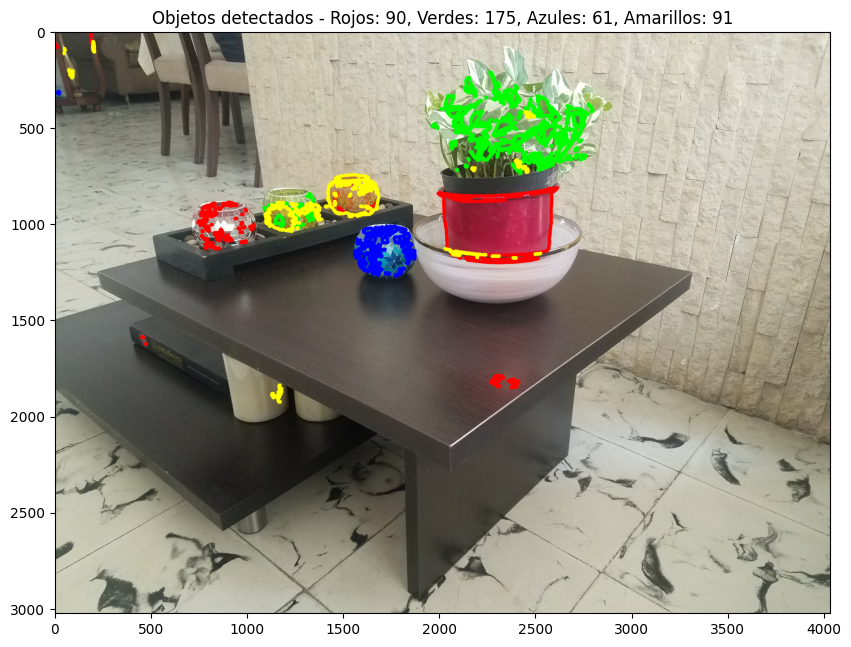

In [ ]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

#Load Image and change to HSV
notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
image_folder = os.path.join(project_dir, 'img', '4.segmentacion')
print(image_folder)
image_files = glob.glob(os.path.join(image_folder, 'punto5.jpg'))
# Make sure there's at least one image
if image_files:
    image_path = image_files[0]
    image = cv2.imread(image_path)
else:
    print("No .jpg files found in the folder.")

# Convert Color
imageHsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imageRgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Red HSV Filter

lowRed1 = np.array([0, 100, 100])
highRed1 = np.array([10, 255, 255])

lorwRed2 = np.array([160, 100, 100])
highRed2 = np.array([179, 255, 255])

redMask1 = cv2.inRange(imageHsv, lowRed1, highRed1)
redMask2 = cv2.inRange(imageHsv, lorwRed2, highRed2)

# Yellow HSV Filter

lowYellow = np.array([10, 100, 100])
highYellow = np.array([30, 255, 255])

# Green HSV Filter
lowGreen = np.array([40, 100, 100])
highGreen = np.array([80, 255, 255])

# Blue HSV Filter
lowBlue = np.array([100, 100, 100])
highBlue = np.array([130, 255, 255])

#Create Color Mask
redMask = cv2.bitwise_or(redMask1, redMask2)
greenMask = cv2.inRange(imageHsv, lowGreen, highGreen)
blueMask = cv2.inRange(imageHsv, lowBlue, highBlue)
yellowMask = cv2.inRange(imageHsv, lowYellow, highYellow)

def CountObjects(baseImage, entryMask, rgbColour, nameColor):
    #GaussianBlurr
    blurredMask = cv2.GaussianBlur(entryMask, (5, 5), 0)

    # Border Detection
    border = cv2.Canny(blurredMask, 50, 100)

    # Find Contourns
    contourns, _ = cv2.findContours(border, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter bySize
    sizeFilter = [cnt for cnt in contourns if 15 < cv2.contourArea(cnt) < 2000]

    # Draw Contourns
    cv2.drawContours(baseImage, sizeFilter, -1, rgbColour, 15)

    #Calculate OBJ Area
    for i, cnt in enumerate(sizeFilter):
        area = cv2.contourArea(cnt)
        print(f"Area del ({nameColor}) {i+1}: {area} en pixeles^2")

    print(f"Objetos {nameColor}: {len(sizeFilter)}")
    return len(sizeFilter)


#Apply to every Mask
resultImage = imageRgb.copy()

numReds = CountObjects(resultImage, redMask, (255, 0, 0), "Rojos")
numGreens = CountObjects(resultImage, greenMask, (0, 255, 0), "Verdes")
numBlues = CountObjects(resultImage, blueMask, (0, 0, 255), "Azules")
numYellow = CountObjects(resultImage, yellowMask, (255, 255, 0), "Amarillo")

plt.figure(figsize=(10, 8))
plt.imshow(resultImage)
plt.title(f"Objetos detectados - Rojos: {numReds}, Verdes: {numGreens}, Azules: {numBlues}, Amarillos: {numYellow}")
plt.show()

resultImageBGR = cv2.cvtColor(resultImage, cv2.COLOR_RGB2BGR)
output_path = os.path.join(os.path.join(project_dir, 'results', '5.segmentacion'), 'resultado_segmentacion.jpg')
cv2.imwrite(output_path, resultImageBGR)

Con el objetivo de buscar colores especificos en una imagen, decidimos utilizar el sistema de mascaras y las capacidades de canny para buscar bordes de los objetos, la idea en si, se basaba en que separaria los tres colores principales del espectro RGB (Rojo, Verde y Azul) y a partir de alli subrayaria con lineas dibujadas sobre la imagen los colores mas vivos de este espectro, la razon por la que elegimos este metodo, fue porque al intener una separacion de canales de la imagen utilizando ( canal_color = imagen_rgb[:, :, 0] ) para tener tres imagenes distintas solo con los colores que necesitabamos, estas poseian demasiada intensidad en ciertos aspectos y en ocasiones nos dieron resultados extraños señalando partes de la imagen que quizas no tenian una intensidad del color como para ser señalada.

Realizando una pruba inicial en la que utilizamos dos arrays de altos y bajos en RGB para encontrar balores para las mascaras, durante esta prueba el resultado fue que no pudimos encontrar buenos bordes para señalar, succediendo un resultado algo similar al anteriormente dicho con la separacion de canales.

Realiando una busqueda nos encontramos varios casos en los que se recomendaba usar HSV y no RGB entre ellos (Color Identification in Images using Python - OpenCV, 2023) en el que se hacia uso de altos y bajos de rangos especificos para encontrar los rojos, los verdes y los azules.

Utilizando este proceso (Vinayak, 2023) y otro que encontramos en la misma ubicacion (Choosing the correct upper and lower HSV boundaries for color detection with cv::inRange (OpenCV), 2024) que recomendaba que para tonos rojos usaramos dos filtros distintos, luego de esto creamos las mascaras usando estos parametros y los aplicamos a la imagen.

Ya una vez separadas creamos un metodo que serviria para dibujar y señalar los objetos, contarlos, y calcular su area en pixeles, en este metodo se aplica el el desenfoque gaussiano para eliminar el ruido de las mascaras, se detectan los bordes de cada mascara y calculamos el care contando los contornos.

Utilizamos el size filter con el objetivo de eliminar contornos extremadamente grandes que puedan tener objetos fuera de lo normal o contornos que no se ajusten.

Resultado

El Resultado que vemos en la imagen es capaz de delimitar contornos y detectar colores tanto lejanos como cercanos, y sibujar lineas de contorno sobre ellos de diferente grosor que sean perfectamente visibles.


Vinayak Ray (03 de Enero de 2023). Color Identification in Images using Python - OpenCV. GeeksforGeeks. https://www.geeksforgeeks.org/python/color-identification-in-images-using-python-opencv/

gururaj (26 de Septiembre de 2024). Choosing the correct upper and lower HSV boundaries for color detection with cv::inRange (OpenCV). https://www.geeksforgeeks.org/computer-vision/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-with-cv-inrange-opencv/